## Introduction

This notebook is the **fourth and final part** of a broader study on **carbon stars and their infrared variability**, building upon the previous three works:

- **[Catalog-Based Positional Matching of Carbon Stars](https://www.kaggle.com/code/nicolsottero/catalog-based-positional-matching-of-carbon-stars)**: where we matched the five target carbon stars (s0 to s4) to the closest stellar sources across 48 deep-sky infrared catalogs.  
- **[Ks Band Photometric Extraction for Carbon Star](https://www.kaggle.com/code/nicolsottero/ks-band-photometric-extraction-for-carbon-star)**: where we extracted and organized the Ks-band photometric measurements for star s1, preparing the data for time series analysis.  
- **[Modeling Carbon Star Light Curves with ML](https://www.kaggle.com/code/nicolsottero/modeling-carbon-star-light-curves-with-ml)**: where we applied and compared four machine learning techniques to model the light curves of the five carbon stars, selecting the best-performing method.

In this fourth stage, we compile **additional materials and appendix content** that complement the core analysis. These include:

- Model prediction comparisons across all stars,  
- Source identification metadata and separation distances,  
- External catalog associations and reference citations.  

This notebook serves as a **technical annex** to the main workflow and supports further exploration and reproducibility.


## Appendix A.1 — Error Comparison Across All Stars

Comparison of model predictions for the five selected carbon stars:


In [ ]:
# This block is protected against automatic execution

run_example = False

if run_example:
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
    from google.colab import files

    # Upload the merged_result.csv file
    uploaded = files.upload()

    merged_result_path = None
    for path in uploaded.keys():
        if "merged_result" in path:
            merged_result_path = path
            break

    if merged_result_path is None:
        raise FileNotFoundError("The file 'merged_result.csv' was not found among the uploaded files.")

    # Load the merged_result.csv file
    merged_df = pd.read_csv(merged_result_path)

    # Filter rows with Julian Date > 0
    merged_df = merged_df[merged_df['Fecha Juliana'] > 0]

    # Remove rows with NaN in key columns
    merged_df = merged_df.dropna(subset=['Fecha Juliana', 'magnitude'])

    # Prepare the data
    X = merged_df['Fecha Juliana'].values.reshape(-1, 1)
    y = merged_df['magnitude'].values

    # Train the Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_predictions = rf.predict(X)

    # Train the Gaussian Process model
    kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)
    gp.fit(X, y)
    gp_predictions, sigma = gp.predict(X, return_std=True)

    # Manually specified MAE values (from prior evaluation)
    rf_mae = 0.32525074999999926
    gp_mae = 1.5895957378336751

    # Plot the real data and error bands
    plt.figure(figsize=(12, 6))
    plt.scatter(merged_df['Fecha Juliana'], merged_df['magnitude'], color='blue', label='Observed Data', s=10)

    # Random Forest central prediction line
    plt.plot(merged_df['Fecha Juliana'], rf_predictions, color='green', linestyle='-', label='RF Prediction')

    # Error band based on RF MAE
    plt.fill_between(merged_df['Fecha Juliana'],
                     rf_predictions - rf_mae,
                     rf_predictions + rf_mae,
                     color='green', alpha=0.2, label=f'RF Error Band (MAE = {rf_mae:.2f})')

    # GP original prediction band (95% confidence)
    plt.fill_between(merged_df['Fecha Juliana'],
                     gp_predictions - 1.96 * sigma,
                     gp_predictions + 1.96 * sigma,
                     alpha=0.3, color='darkorange', label='GP 95% Confidence Interval')

    # Additional GP error band using MAE
    plt.fill_between(merged_df['Fecha Juliana'],
                     gp_predictions - 1.96 * sigma - gp_mae,
                     gp_predictions + 1.96 * sigma + gp_mae,
                     color='orange', alpha=0.2, label=f'GP Error Band (MAE = {gp_mae:.2f})')

    plt.xlabel('Julian Date')
    plt.ylabel('Magnitude')
    plt.title('Comparison of Error Bands: GP vs RF')
    plt.gca().invert_yaxis()  # Invert magnitude axis
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Execution disabled to prevent automatic running in shared notebooks.")


### Result:
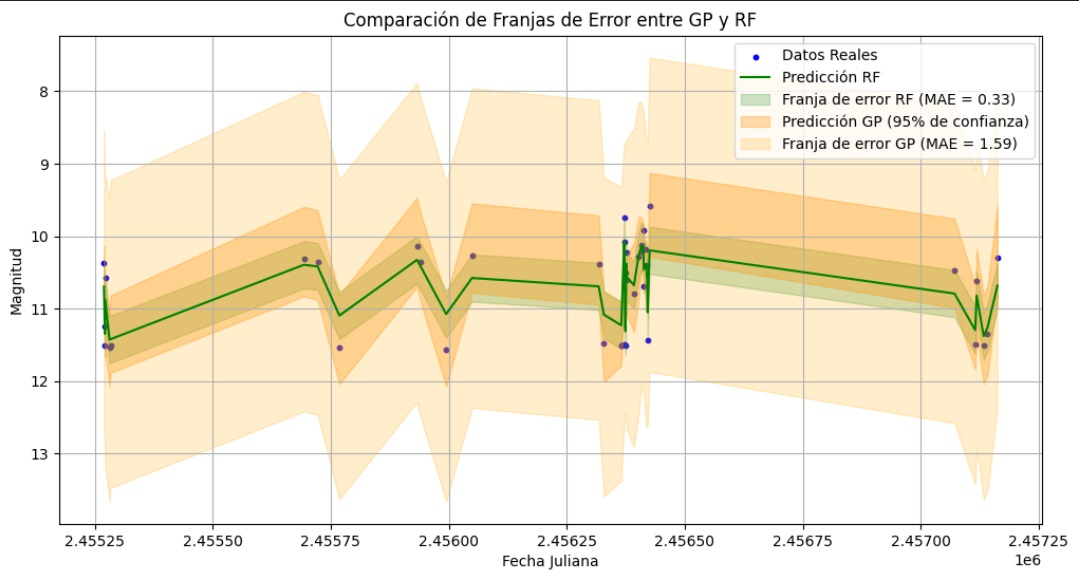

### All Results:
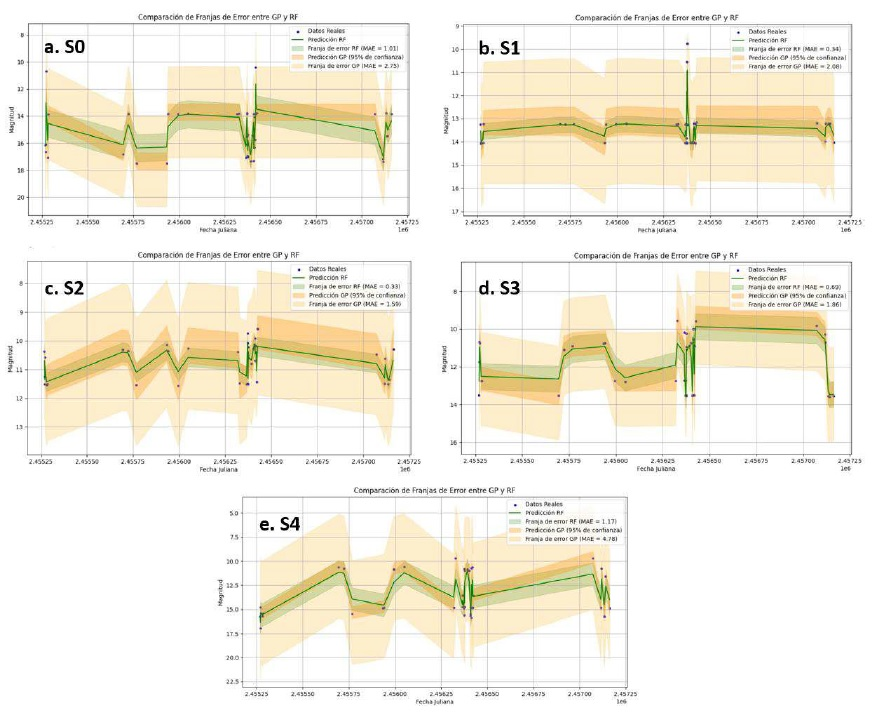

## Appendix A.2 — Mean Angular Separation

The table below lists the sources identified in the first stage of the pipeline. These correspond to objects labeled **−1** in the VVV survey, which are high-confidence matches with **±0.01 mag photometric errors**.

The column **<Ks>ϕ** shows the **flux-weighted average Ks-band magnitude** for each carbon star. This provides a representative magnitude value based on all matched measurements.

The column **θ** reports the **mean angular separation (in arcseconds)** between the identified source and its catalog position, as computed during the positional matching step.

This metric is important to assess the astrometric reliability of the identification.

Below is the code used to calculate the average angular separation.


In [ ]:
# This block is protected against automatic execution

run_example = False

if run_example:
    import pandas as pd
    from google.colab import files

    # Upload the input file
    print("Select the file 'resultados_combinados.csv' to upload:")
    uploaded_file = files.upload()

    # Define input and output filenames
    input_filename = 'resultados_combinados.csv'  # Adjust if different
    output_filename = 'star_4_measurements.csv'

    # Load the CSV file (no headers)
    df = pd.read_csv(input_filename, header=None)

    # Filter rows corresponding to Star 4 (every 5th line starting from index 4)
    df_star_4 = df[df.index % 5 == 4]

    # Save the filtered data to a new CSV file
    df_star_4.to_csv(output_filename, index=False, header=False)

    print(f"{len(df_star_4)} measurements of the star were saved to '{output_filename}'.")

    # Download the result
    files.download(output_filename)
else:
    print("Execution disabled to prevent automatic running in shared notebooks.")


### Table:
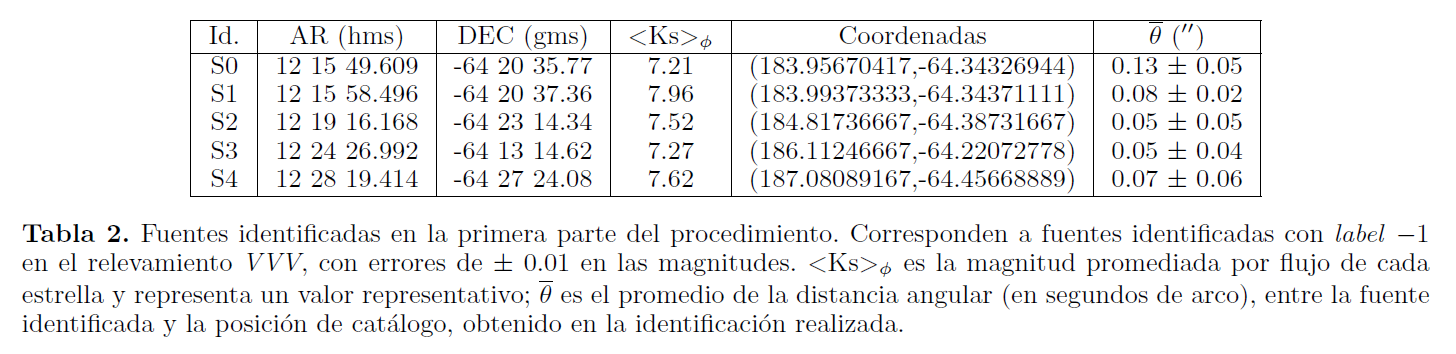

## Appendix A.3 — Identification of Sources in Other Catalogs

The five carbon stars analyzed in this study are matched with their entries in the CGCS (Catalogue of Galactic Carbon Stars) and visually identified in the constellation **Virgo**. Below is a summary of each star:

- **s0** — CGCS 3204. Visual magnitude: **16.9**. Constellation: *Virgo*.
- **s1** — CGCS 3206. Visual magnitude: **16.0**. Constellation: *Virgo*.
- **s2** — CGCS 3214. Visual magnitude: **16.77**. Constellation: *Virgo*.
- **s3** — CGCS 3226. Visual magnitude: **17.0**. Constellation: *Virgo*.
- **s4** — CGCS 3242. Visual magnitude: **16.22**. Constellation: *Virgo*.


### Table:
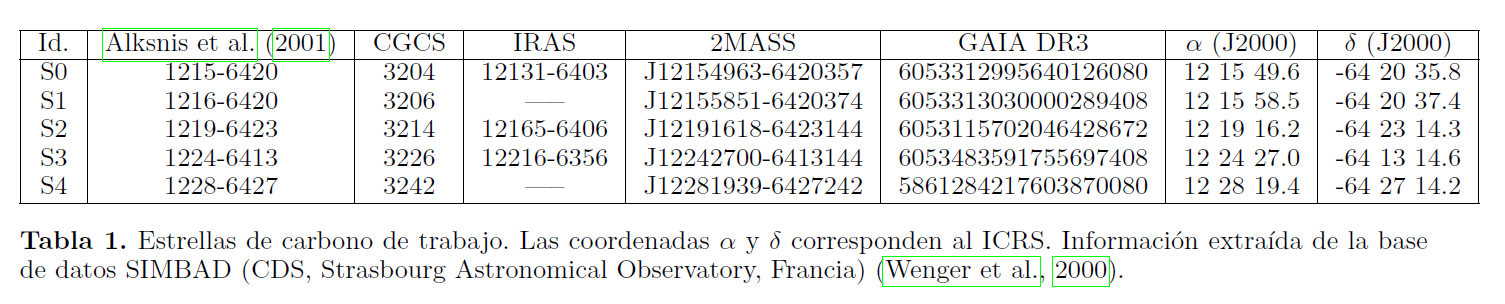

## Appendix A.4 — Publication and Citation

### All results presented in this notebook were part of a scientific paper accepted for publication by the **Asociación Argentina de Astronomía (AAA)**.

### **Reference**:  
### Ottero, N. & Merlo, D., 2025, *Boletín de la Asociación Argentina de Astronomía (BAAA)*, **vol. 66**, in press.
